In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pima = pd.read_csv("preprocessed_data.csv")

In [4]:
pima.columns

Index(['Pregnancies', 'BloodPressure', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose', 'Insulin',
       'Outcome'],
      dtype='object')

In [5]:
#feature selection, split dataset in features and target variable
feature_cols = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age', 'BMI', 'Glucose', 'Insulin'] 
target = ['Outcome']
X = pima[feature_cols] # Features
y = pima[target] # Target variable
print(X.shape)
print(y.shape)

(768, 8)
(768, 1)


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
print(X_train.dtypes)
print(y_train.dtypes)

Pregnancies                 float64
BloodPressure               float64
SkinThickness               float64
DiabetesPedigreeFunction    float64
Age                         float64
BMI                         float64
Glucose                     float64
Insulin                     float64
dtype: object
Outcome    int64
dtype: object


In [8]:
pima.head()

,Pregnancies,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,BMI,Glucose,Insulin,Outcome
0,0.647150,0.865276,-0.019315,0.933847,-0.729820,0.181733,0.588927,1.445691,1
1,-0.848970,-1.205989,-0.531737,0.223108,-0.729820,-0.868800,-0.378101,-0.189304,0
2,1.245598,2.015979,-0.702545,-0.487630,-0.729820,-1.364051,0.746595,-0.103252,1
3,-0.848970,-1.074480,-0.531737,-0.487630,0.103101,-0.643686,-1.022787,-1.049828,0
4,-1.148194,0.503626,-2.752234,0.933847,1.073750,1.607456,2.596563,-0.017199,1


## Standard ANN (2 hidden layers)

In [9]:
# Create regular model (optimizer='sgd')
model_1 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Explicit Input layer
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model_1.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_1.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_1.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_1.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5902 - loss: 0.6962   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.6609 - loss: 0.6593
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7206 - loss: 0.6334 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7154 - loss: 0.6128 
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.6762 - loss: 0.6150
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7094 - loss: 0.5864 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7038 - loss: 0.5734 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.7217 - loss: 0.5600
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7279 - loss: 0.5355 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7236 - loss: 0.5399 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.7409 - loss: 0.5335
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 914

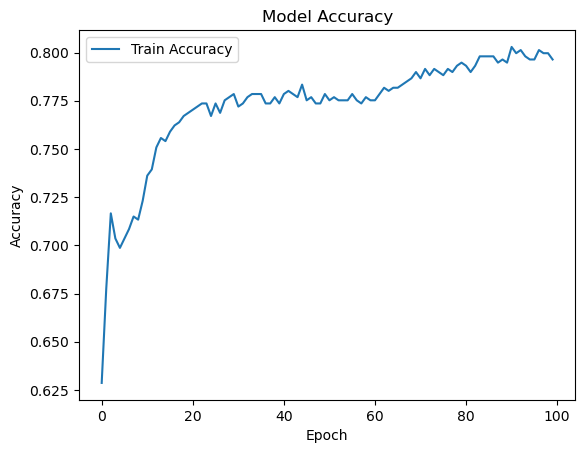

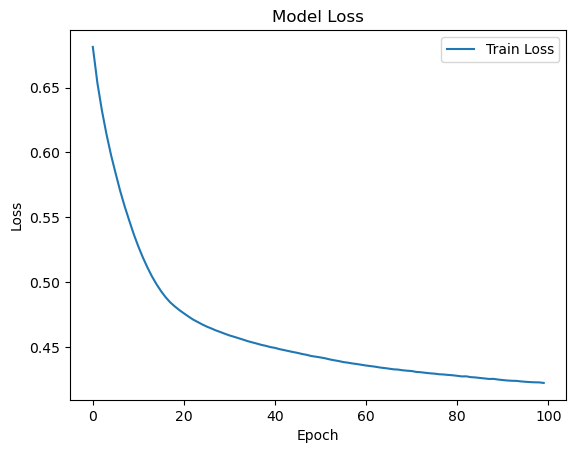

In [11]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

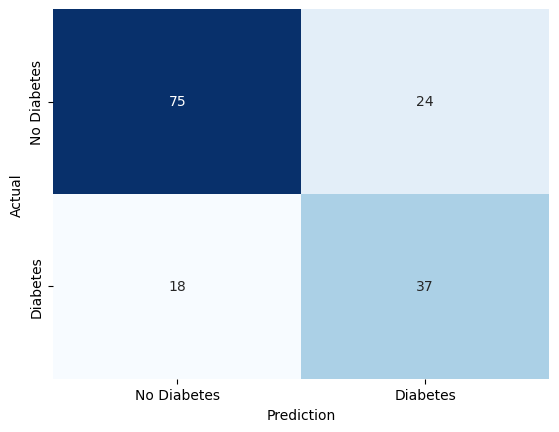

<Figure size 640x480 with 0 Axes>

In [12]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [13]:
# Create regular model (optimizer='adam')
model_2 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Explicit Input layer
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model_2.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_2.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5500 - loss: 0.6704   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6778 - loss: 0.6165 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7231 - loss: 0.5823 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7422 - loss: 0.5431
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7235 - loss: 0.5406
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7499 - loss: 0.5229
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.7769 - loss: 0.4738
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.7384 - loss: 0.4885
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7417 - loss: 0.4998 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7464 - loss: 0.4864
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7748 - loss: 0.4558 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 901

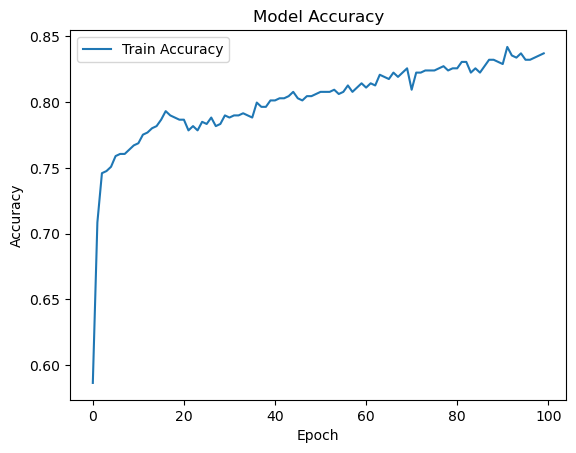

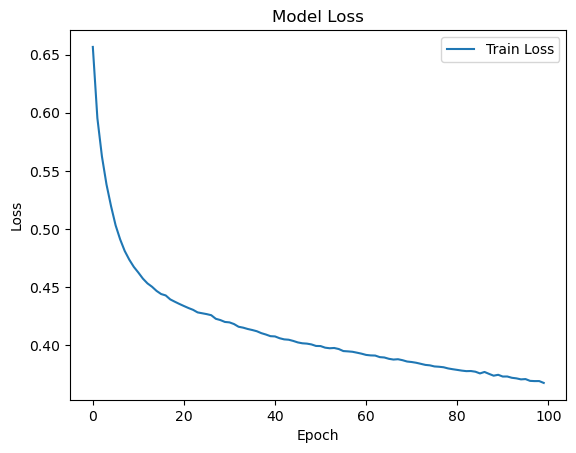

In [15]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

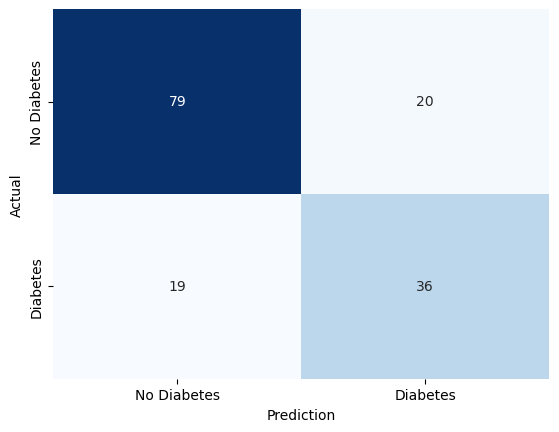

<Figure size 640x480 with 0 Axes>

In [16]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## Dropout-Enhanced ANN

In [17]:
# Create drop out model (optimizer='sgd')
# Define input layer explicitly
model_d_1 = keras.models.Sequential([
  keras.layers.Input(shape=(8,)), 
  keras.layers.Dense(12, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(8, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compile model
model_d_1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train model
history = model_d_1.fit(X_train, y_train, epochs=100, batch_size=16)

# Result for dropout model
scores = model_d_1.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_d_1.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_d_1.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4636 - loss: 0.7303   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6139 - loss: 0.6817
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 0.6435 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6579 - loss: 0.6531 
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6602 - loss: 0.6415 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6748 - loss: 0.6155
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6634 - loss: 0.6276 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6937 - loss: 0.6100
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.6767 - loss: 0.6191
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6651 - loss: 0.6086 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6795 - loss: 0.6174 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/s

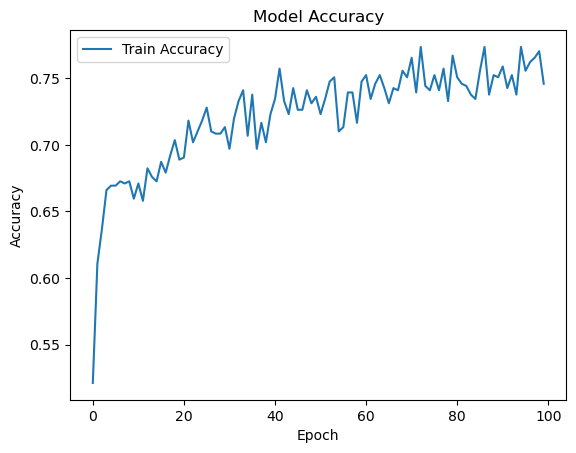

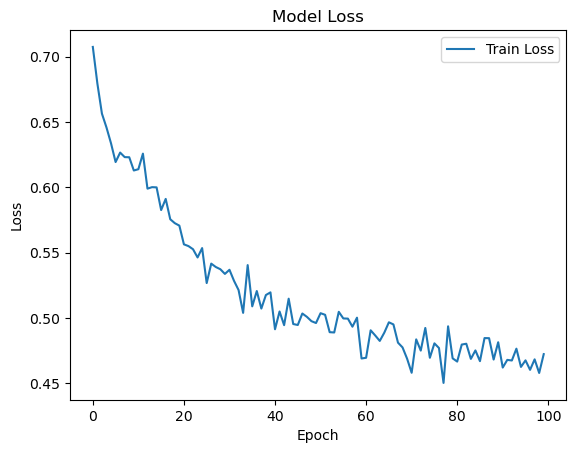

In [19]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

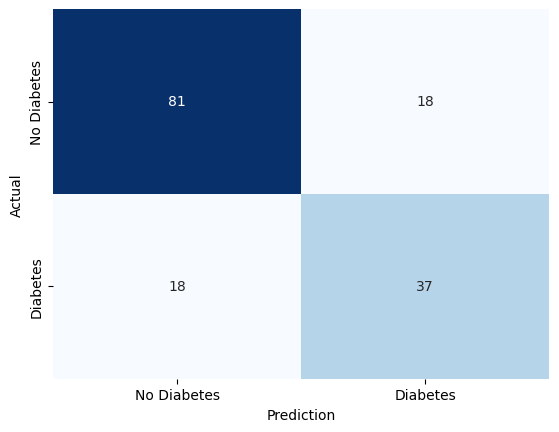

<Figure size 640x480 with 0 Axes>

In [20]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [21]:
# Create drop out model (optimizer='adam')
# Define input layer explicitly
model_d_2 = keras.models.Sequential([
  keras.layers.Input(shape=(8,)), 
  keras.layers.Dense(12, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(8, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compile model
model_d_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Train model
history = model_d_2.fit(X_train, y_train, epochs=100, batch_size=16)

# Result for dropout model
scores = model_d_2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_d_2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_d_2.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3945 - loss: 0.8330   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5162 - loss: 0.7323 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.6136 - loss: 0.6649
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6687 - loss: 0.6568
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7151 - loss: 0.6302 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6857 - loss: 0.6047 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.7448 - loss: 0.5533
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7252 - loss: 0.5477 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7241 - loss: 0.5432
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.7570 - loss: 0.5176
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.7681 - loss: 0.4957
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1

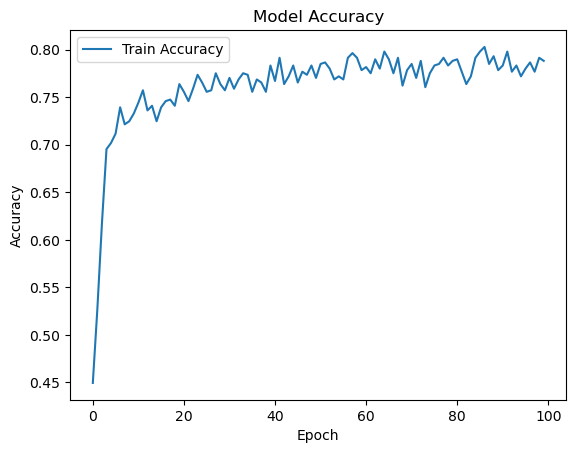

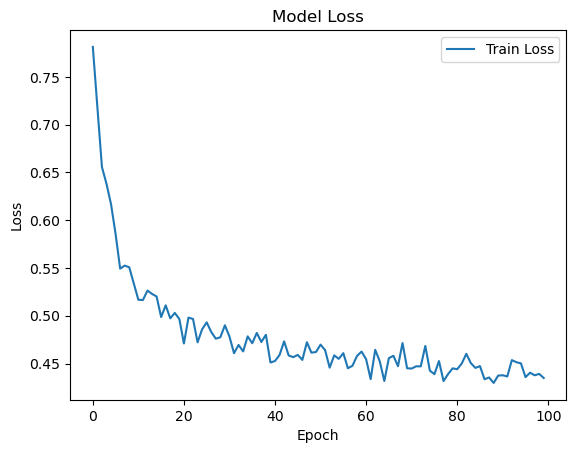

In [23]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

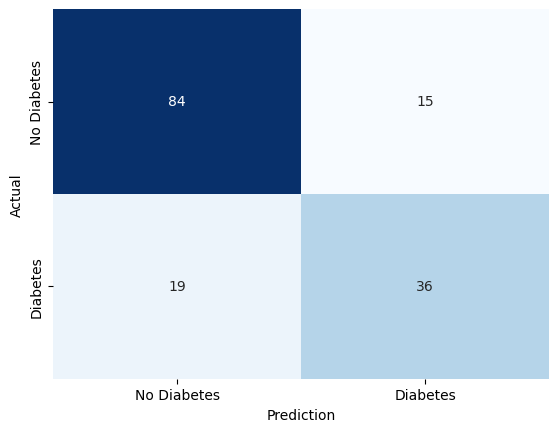

<Figure size 640x480 with 0 Axes>

In [24]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## L1-Regularized ANN (Lasso)

In [25]:
# Create model by adding L1 regularization (Lasso) - (optimizer='sgd')
# l -regularization strength
l = 0.01 

model_L1 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1(l)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1(l)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_L1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model_L1.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_L1.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L1): %.2f%%\n" % (scores[1] * 100))
scores = model_L1.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L1): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_L1.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L1):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L1):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L1):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L1):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6766 - loss: 1.2402   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6568 - loss: 1.1990 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6346 - loss: 1.1858 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6810 - loss: 1.1252
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.6667 - loss: 1.1204
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6303 - loss: 1.1034 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.6607 - loss: 1.0645
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6675 - loss: 1.0440 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6506 - loss: 1.0427 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6579 - loss: 1.0204
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6727 - loss: 1.0070 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

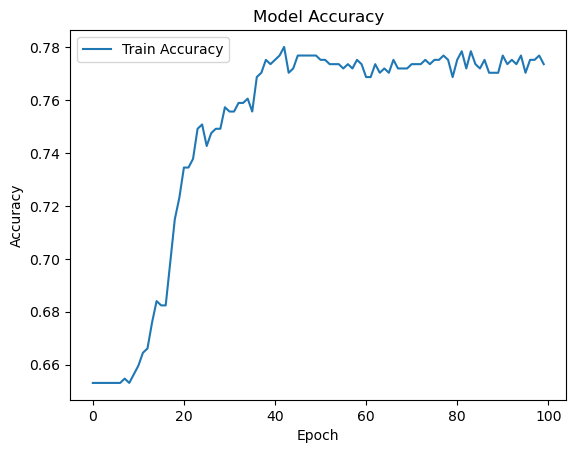

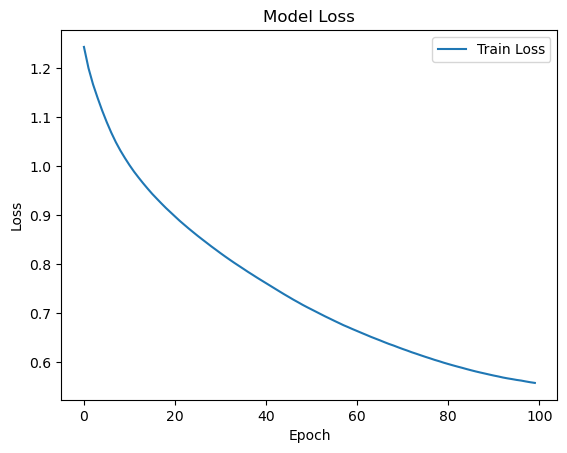

In [27]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

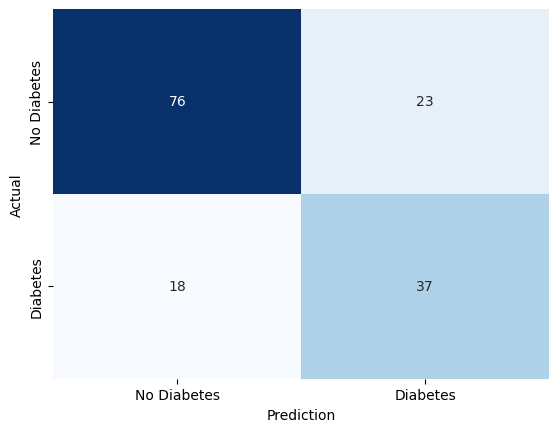

<Figure size 640x480 with 0 Axes>

In [28]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [29]:
# Create model by adding L1 regularization (Lasso) - (optimizer='adam')
# l -regularization strength
l = 0.001 

model_L1 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1(l)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l1(l)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_L1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model_L1.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_L1.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L1): %.2f%%\n" % (scores[1] * 100))
scores = model_L1.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L1): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_L1.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L1):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L1):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L1):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L1):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6385 - loss: 0.6847   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6752 - loss: 0.6079 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6859 - loss: 0.5853 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7128 - loss: 0.5490
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7373 - loss: 0.5532 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7279 - loss: 0.5679
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7629 - loss: 0.5158
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7581 - loss: 0.5337
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7548 - loss: 0.5392 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7850 - loss: 0.5024 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7796 - loss: 0.4717
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 93

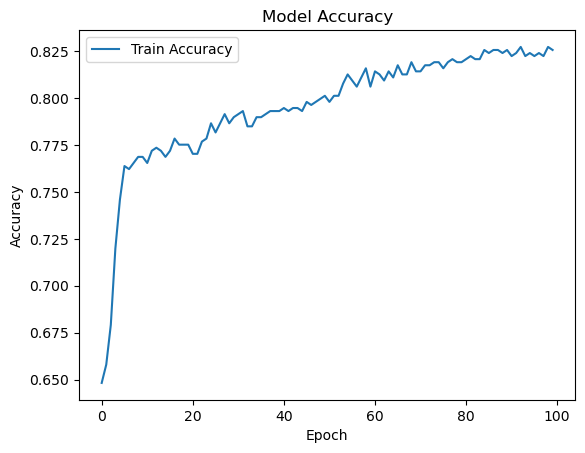

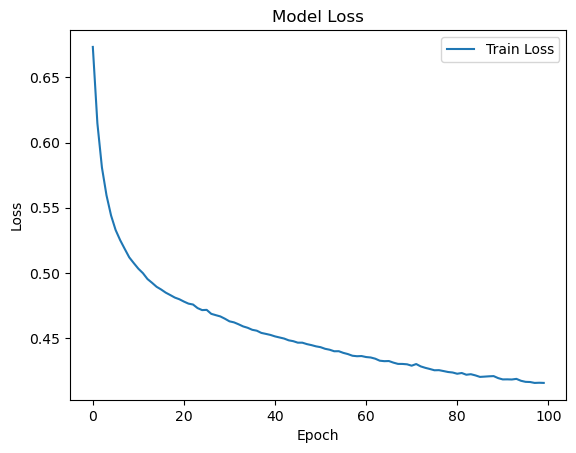

In [31]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

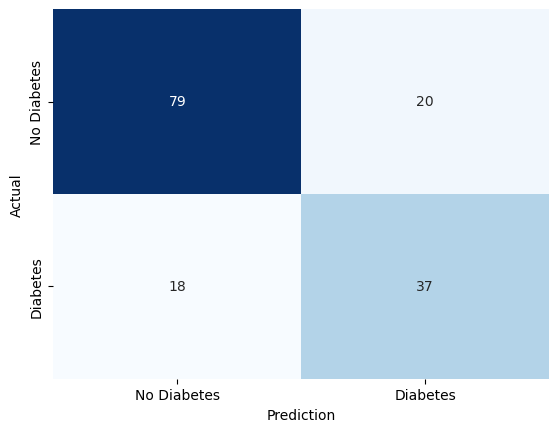

<Figure size 640x480 with 0 Axes>

In [32]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## L2-Regularized ANN (Ridge)

In [33]:
# Create model by adding L2 regularization (Ridge) - (optimizer='sgd')
# l -regularization strength
l = 0.01 

model_L2 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_L2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model_L2.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_L2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L2): %.2f%%\n" % (scores[1] * 100))
scores = model_L2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L2): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_L2.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L2):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L2):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L2):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L2):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.5013 - loss: 0.9034 
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6363 - loss: 0.8577 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6601 - loss: 0.8323 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.6865 - loss: 0.8132
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.6653 - loss: 0.8066
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.7110 - loss: 0.7759
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.7000 - loss: 0.7729
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7158 - loss: 0.7514 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.7120 - loss: 0.7518
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.7087 - loss: 0.7349
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7299 - loss: 0.7072 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1

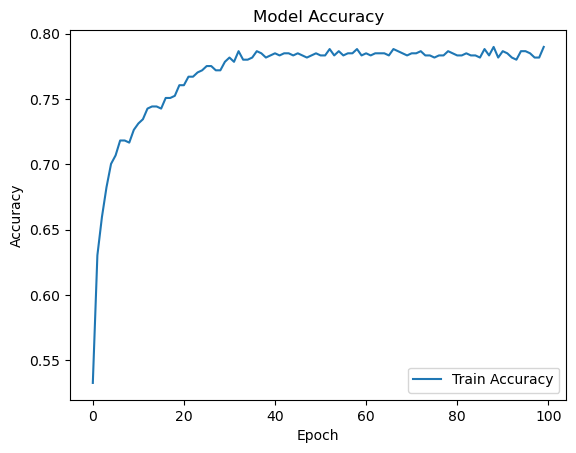

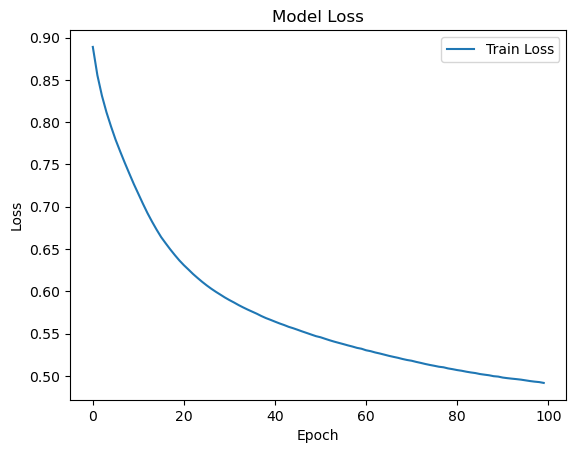

In [35]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

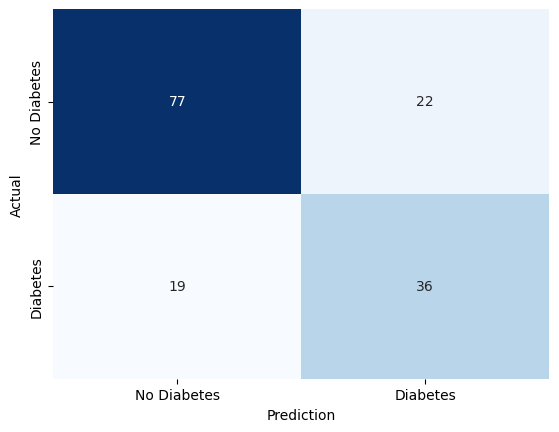

<Figure size 640x480 with 0 Axes>

In [36]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [37]:
# Create model by adding L2 regularization (Ridge) - (optimizer='adam')
# l -regularization strength
l = 0.001  

model_L2 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=keras.regularizers.l2(l)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model_L2.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_L2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L2): %.2f%%\n" % (scores[1] * 100))
scores = model_L2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L2): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_L2.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L2):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L2):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L2):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L2):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6063 - loss: 0.6856   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6811 - loss: 0.6372 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6835 - loss: 0.5949 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.7223 - loss: 0.5499
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7299 - loss: 0.5459 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7299 - loss: 0.5319 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7627 - loss: 0.5032 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7612 - loss: 0.5103
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7649 - loss: 0.5049
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7786 - loss: 0.4760 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7758 - loss: 0.4570 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 985u

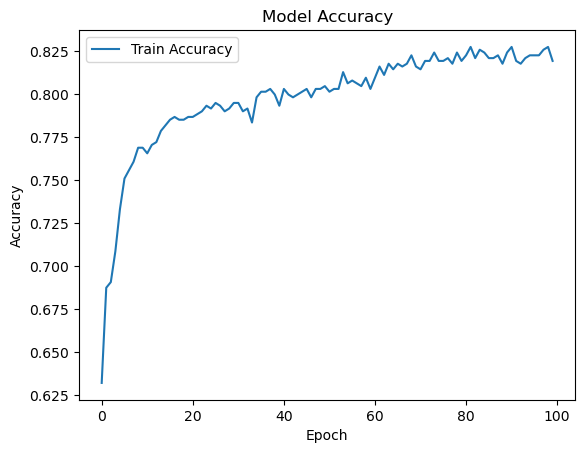

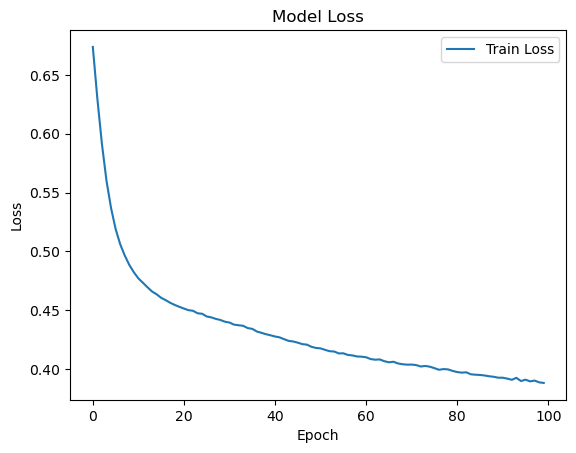

In [39]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

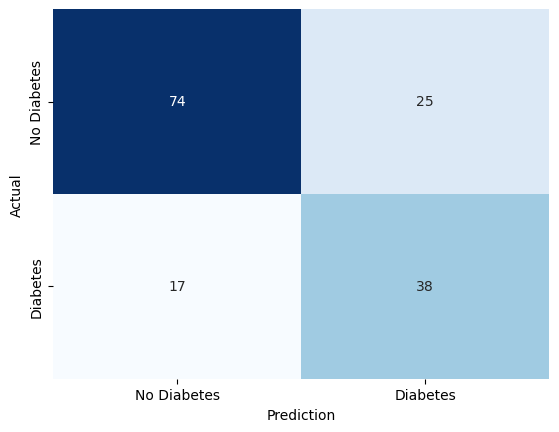

<Figure size 640x480 with 0 Axes>

In [40]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## Elastic Net ANN (L1 + L2 Regularization)

In [41]:
from tensorflow.keras import regularizers  
# Create model by adding L1 + L2 regularization (ElasticNet) - (optimizer='sgd')
# l1 - L1 regularization strength, l2 - L2 regularization strength
l1 = 0.01  # L1 regularization strength
l2 = 0.01  # L2 regularization strength

model_ElasticNet = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_ElasticNet.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model_ElasticNet.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_ElasticNet.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L1 + L2): %.2f%%\n" % (scores[1] * 100))
scores = model_ElasticNet.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L1 + L2): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_ElasticNet.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L1 + L2):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L1 + L2):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L1 + L2):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L1 + L2):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6515 - loss: 1.4038   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6613 - loss: 1.3746 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7019 - loss: 1.3394 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.7131 - loss: 1.3032
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7436 - loss: 1.2775 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7160 - loss: 1.2630 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.7347 - loss: 1.2275
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7252 - loss: 1.2149 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7282 - loss: 1.1947
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7213 - loss: 1.1657 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7361 - loss: 1.1511 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 894u

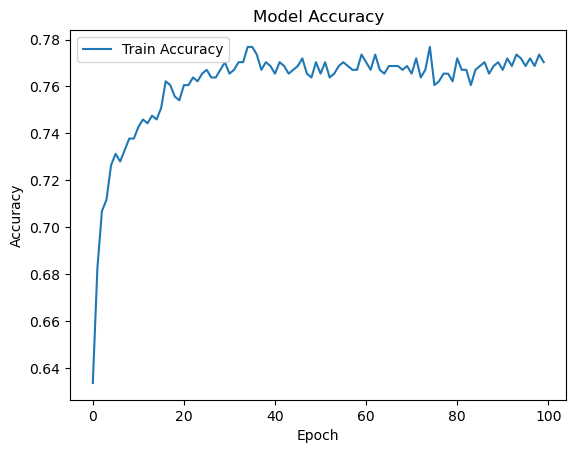

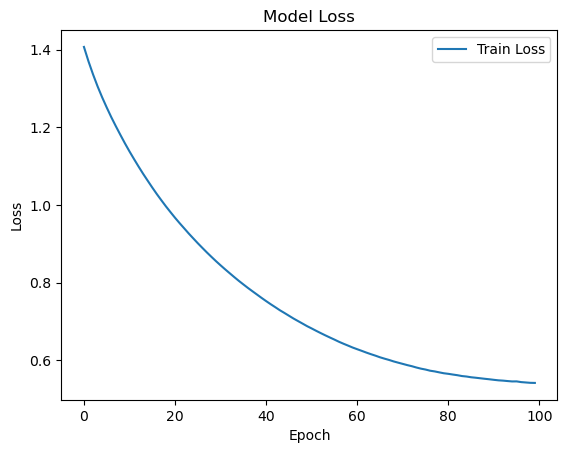

In [43]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

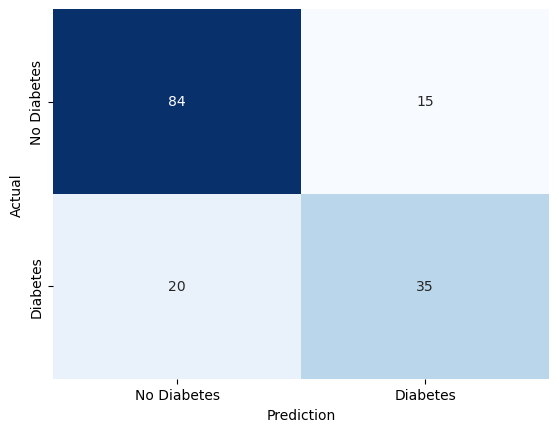

<Figure size 640x480 with 0 Axes>

In [44]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [45]:
from tensorflow.keras import regularizers 
# Create model by adding L1 + L2 regularization (ElasticNet) - (optimizer='adam')
# l1 - L1 regularization strength, l2 - L2 regularization strength
l1 = 0.001  # L1 regularization strength
l2 = 0.001  # L2 regularization strength

model_ElasticNet = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=regularizers.l1_l2(l1=l1, l2=l2)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_ElasticNet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
history = model_ElasticNet.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_ElasticNet.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy (L1 + L2): %.2f%%\n" % (scores[1] * 100))
scores = model_ElasticNet.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy (L1 + L2): %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_ElasticNet.predict(X_test) > 0.5).astype("int32")
print("Accuracy (L1 + L2):",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision (L1 + L2):",metrics.precision_score(y_test, y_test_pred)) 
print("Recall (L1 + L2):",metrics.recall_score(y_test, y_test_pred))
print("F1-Score (L1 + L2):", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5594 - loss: 0.8012   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5982 - loss: 0.7711 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6808 - loss: 0.7130 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6703 - loss: 0.7006 
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6949 - loss: 0.6531
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7090 - loss: 0.6362 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.6862 - loss: 0.6409
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7481 - loss: 0.5803
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7464 - loss: 0.5784
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.5220 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7869 - loss: 0.5111 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 772

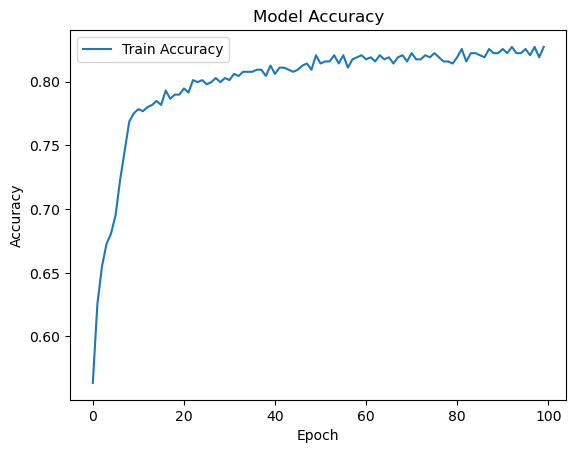

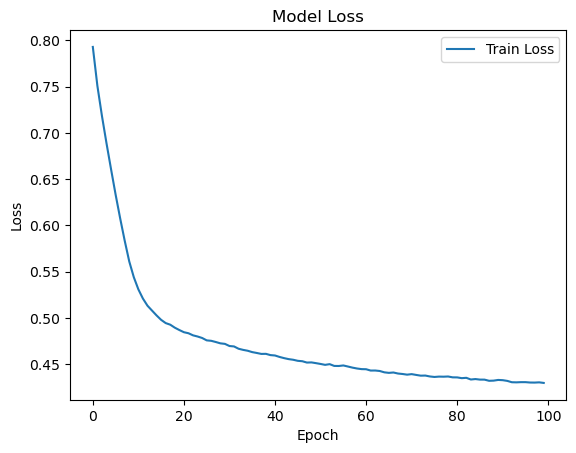

In [47]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

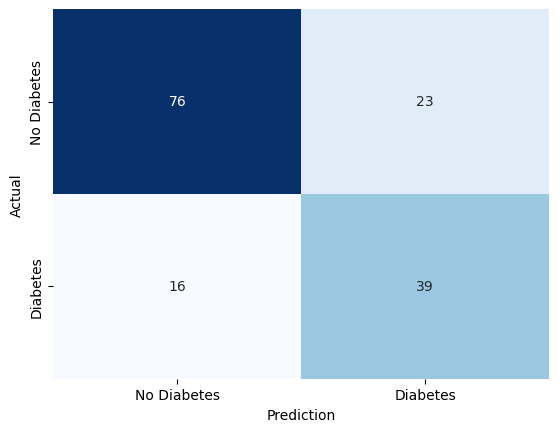

<Figure size 640x480 with 0 Axes>

In [48]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## Dropout + L2-Regularized ANN

In [49]:
# Dropout + L2 Regularization (Ridge) - (optimizer='sgd')
# Define L2 regularization strength
l = 0.01  

# Create model with Dropout and L2 regularization
model_d_L2 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l)),
    keras.layers.Dropout(0.2),  # Dropout after the first dense layer
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l)),
    keras.layers.Dropout(0.2),  # Dropout after the second dense layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compile the model
model_d_L2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model_d_L2.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_d_L2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_d_L2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_d_L2.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5824 - loss: 0.8684   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6691 - loss: 0.8115 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6623 - loss: 0.8013 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6776 - loss: 0.7936
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7120 - loss: 0.7589 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.7184 - loss: 0.7529
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6829 - loss: 0.7578 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6855 - loss: 0.7504 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.7169 - loss: 0.7272
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7155 - loss: 0.7259 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6992 - loss: 0.7309 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

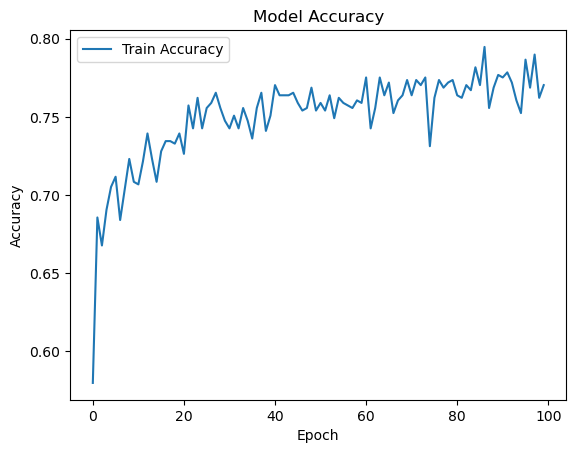

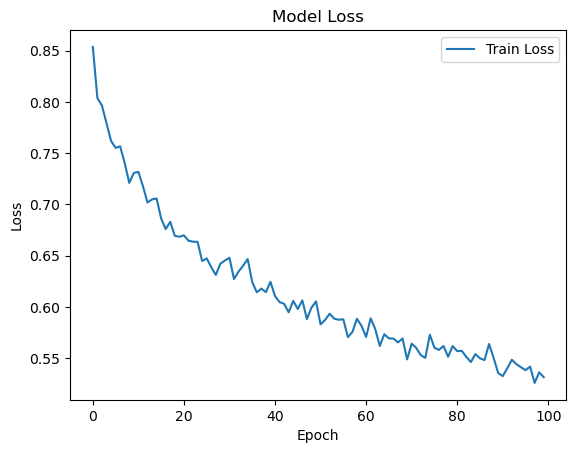

In [51]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

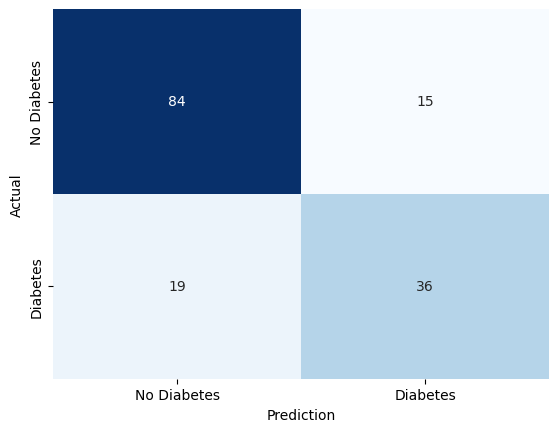

<Figure size 640x480 with 0 Axes>

In [52]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [53]:
# Dropout + L2 Regularization (Ridge) - (optimizer='adam')
# Define L2 regularization strength
l = 0.001  

# Create model with Dropout and L2 regularization
model_d_L2 = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),  # Define input shape separately
    keras.layers.Dense(12, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l)),
    keras.layers.Dropout(0.2),  # Dropout after the first dense layer
    keras.layers.Dense(8, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(l)),
    keras.layers.Dropout(0.2),  # Dropout after the second dense layer
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compile the model
model_d_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model_d_L2.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_d_L2.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_d_L2.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_d_L2.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.5793 - loss: 0.6997 
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.6793
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6884 - loss: 0.6220 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.7373 - loss: 0.5903
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6986 - loss: 0.5955 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6858 - loss: 0.5675
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7106 - loss: 0.5887 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7452 - loss: 0.5456 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7498 - loss: 0.5404
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7505 - loss: 0.5029 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7256 - loss: 0.5496
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

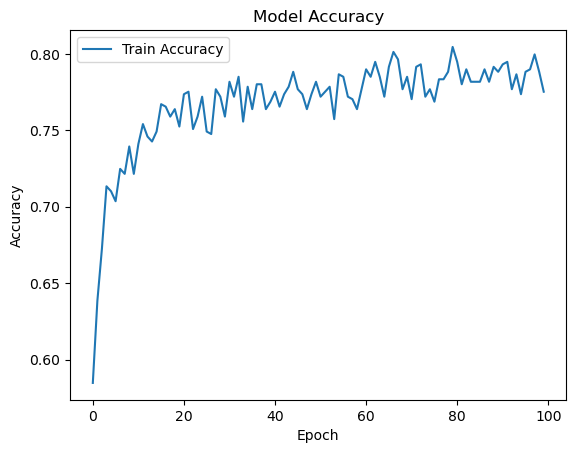

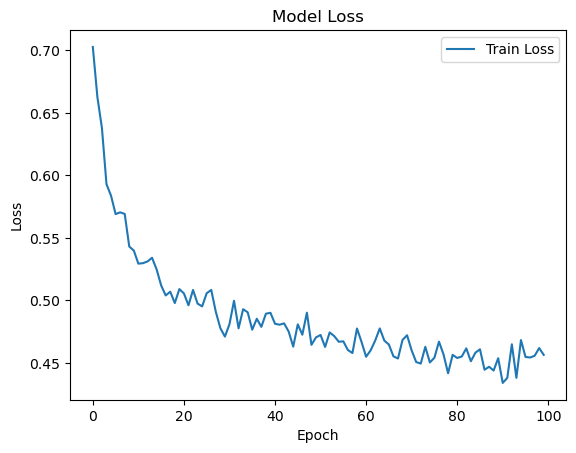

In [55]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

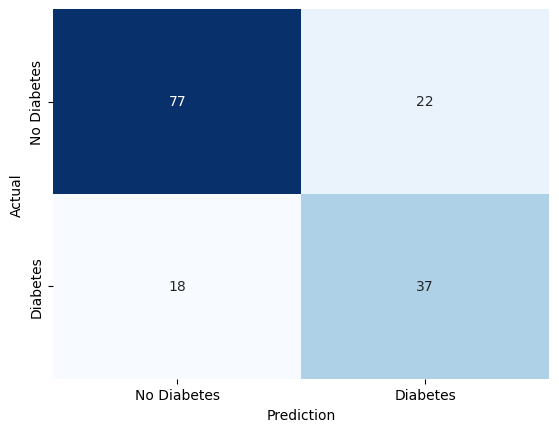

<Figure size 640x480 with 0 Axes>

In [56]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

## DNN (3 hidden layers)

In [57]:
# Create DNN model - (optimizer='sgd')
model_deep = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_deep.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model_deep.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_deep.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_deep.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_deep.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.6043 - loss: 0.7058 
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6551 - loss: 0.6863 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6463 - loss: 0.6784 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6622 - loss: 0.6543
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6532 - loss: 0.6512 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6519 - loss: 0.6400 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6536 - loss: 0.6338 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6894 - loss: 0.6109
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7103 - loss: 0.5921 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6629 - loss: 0.6076 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7047 - loss: 0.5812
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

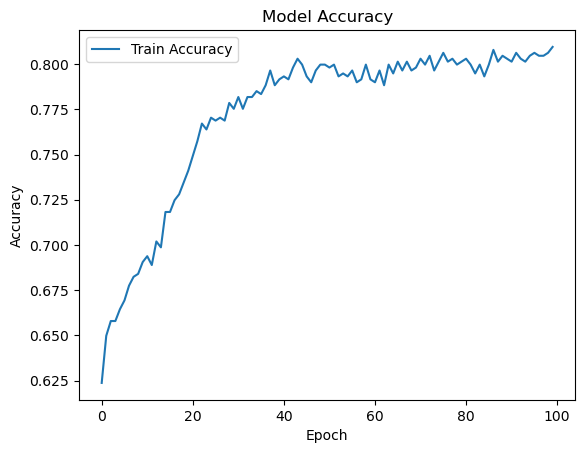

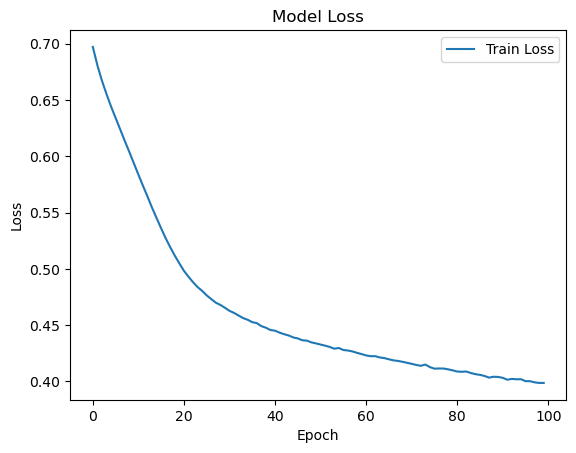

In [59]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

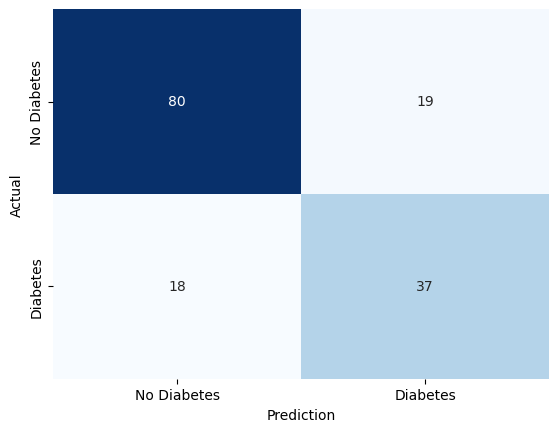

<Figure size 640x480 with 0 Axes>

In [60]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()

In [61]:
# Create DNN model - (optimizer='adam')
model_deep = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model_deep.fit(X_train, y_train, epochs=100, batch_size=16)

# Results - Accuracy
scores = model_deep.evaluate(X_train, y_train, verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))
scores = model_deep.evaluate(X_test, y_test, verbose = False)
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100))

y_test_pred = (model_deep.predict(X_test) > 0.5).astype("int32")
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred)) 
print("Precision:",metrics.precision_score(y_test, y_test_pred)) 
print("Recall:",metrics.recall_score(y_test, y_test_pred))
print("F1-Score:", metrics.f1_score(y_test, y_test_pred))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7164 - loss: 0.6210   
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7160 - loss: 0.5808 
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7347 - loss: 0.5334 
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7613 - loss: 0.4835
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7793 - loss: 0.4412 
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7728 - loss: 0.4683 
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7698 - loss: 0.4414 
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7661 - loss: 0.4434 
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7901 - loss: 0.4172 
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8218 - loss: 0.4003 
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - loss: 0.4041 
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

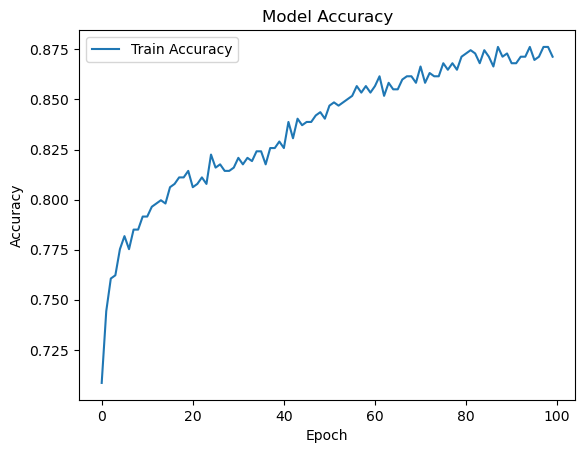

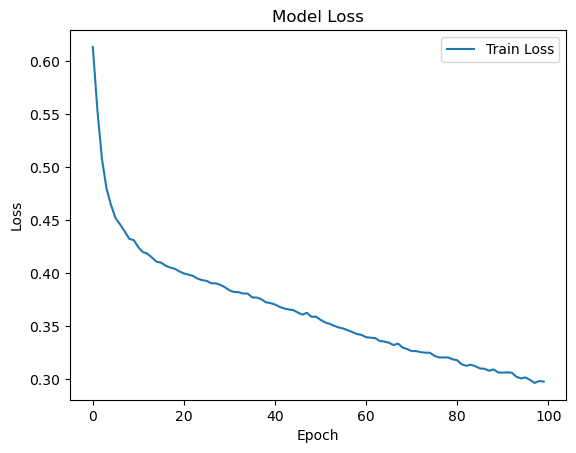

In [63]:
# Model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Add label for the legend
plt.title('Model Accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

# Model Loss 
plt.plot(history.history['loss'], label='Train Loss')  # Add label for the legend
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend()  # Now the label will be used
plt.show()

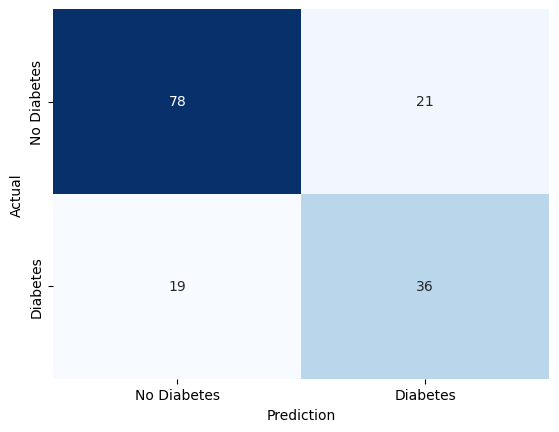

<Figure size 640x480 with 0 Axes>

In [64]:
c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot = True, xticklabels = ['No Diabetes', 'Diabetes'], yticklabels = ['No Diabetes', 'Diabetes'], cbar = False, cmap ='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual") 
plt.show() 
plt.clf()